In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SelfOrganizingMap:
    def __init__(
        self, input_dim, grid_size, lr=0.1, radius=None, epochs=1000
    ):
        self.input_dim = input_dim
        self.grid_size = grid_size
        self.lr = lr
        self.epochs = epochs
        self.radius = radius if radius else max(grid_size) / 2
        self.weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

    def find_bmu(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, sample, bmu):
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                if dist_bmu <= self.radius:
                    influence = np.exp(-(dist_bmu**2) / (2 * (self.radius**2)))
                    self.weights[i, j] += (
                        self.lr * influence * (sample - self.weights[i, j])
                    )

    def train(self, data):
        for epoch in range(self.epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu)
            # Decay learning rate and radius
            self.lr *= 0.995
            self.radius *= 0.995

    def visualize(self):
        plt.imshow(
            self.weights.reshape(self.grid_size[0], self.grid_size[1], self.input_dim)
        )
        plt.title("Self-Organizing Map")
        plt.show()

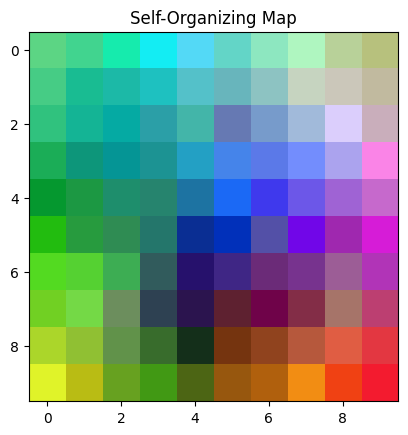

In [3]:
data = np.random.rand(100, 3)  # 100 samples, 3 features
som = SelfOrganizingMap(input_dim=3, grid_size=(10, 10))
som.train(data)
som.visualize()